In [46]:
#pip install matplotlib
#pip3 install seaborn

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [56]:
root_path = '/Users/lpwilson/Ada/Developer/projects/Capstone/EEO1s/'
#read in the long format csv
EEO1_data = pd.read_csv(root_path + 'long_csv.csv')

In [57]:
EEO1_data = pd.DataFrame(EEO1_data)
EEO1_data = EEO1_data.drop(columns = ['Unnamed: 0'])
#EEO1_data.info()
#EEO1_data.head(20)

# goal: 
make a line plot filtered by company and job category that tracks gender (or race) 
as a percentage of total employees in that category over years. 

so, the x-axis points will be the year values
and the y-axis points will be the percentage of employees of each gender.

let's try to get the x- and y- values that we need. 

In [62]:
#set up the filters
company = "Amazon"
#I want to only look at some job categories for now, for readability.
job_cats = ['Exec/Sr. Officials & Mgrs']
##job_categories = ['Exec/Sr. Officials & Mgrs','First/Mid Officials & Mgrs','Professionals','Technicians','Sales Workers','Administrative Support','Craft Workers','Operatives','Laborers & Helpers','Service Workers']

#choosing these names to match our queries.
sortBy1 = 'job_category'
sortBy2 = 'gender'

Now let's try to get the y-values for one of the job categories.
we want the sum of count_employees for a given job category and gender.

Let's also filter (query) by the job cats we want.

In [60]:
#can I do the query above and below in one line?
dbl_qry_amz = EEO1_data.query(f"company == '{company}'").query('job_category.isin(@job_cats)').groupby(["year", sortBy1, sortBy2]).agg({'count_employees': 'sum'})
dbl_qry_amz = pd.DataFrame(dbl_qry_amz)

([<matplotlib.axis.XTick at 0x1165af460>,
 [Text(2019.0, 0, '2019'), Text(2020.0, 0, '2020'), Text(2021.0, 0, '2021')])

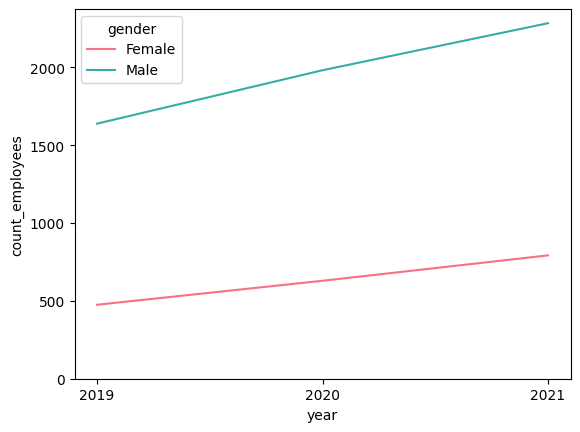

In [70]:
raw_num_plot = sns.lineplot(data = dbl_qry_amz, x='year', y='count_employees', hue = 'gender', palette="husl")
plt.ylim(0)
loc, labels = plt.xticks()
plt.xticks(np.arange(math.ceil(min(loc)), max(loc), step = 1)) #this is my brute force way of getting the ticks to be on whole number years 
#raw_num_plot.set(xticks=[2019, 2020, 2021])

This is a good starting point.

Next:
Graph the percent of females in each field over years?
That would allow us to have more job categories, all on the same graph.

I'm focusing on Amazon because I think that their demographics are the most distorted by different job categories.

In [53]:
perc_qry = dbl_qry_amz.groupby(level = 0, group_keys = False).apply(lambda x:100 * x /float(x.sum()))

perc_qry

count_employees
year job_category              gender                 
2019 Exec/Sr. Officials & Mgrs Female        22.479886
                               Male          77.520114
2020 Exec/Sr. Officials & Mgrs Female        24.099617
                               Male          75.900383
2021 Exec/Sr. Officials & Mgrs Female        25.756098
                               Male          74.243902

[[<matplotlib.axis.XTick at 0x1160b3430>,

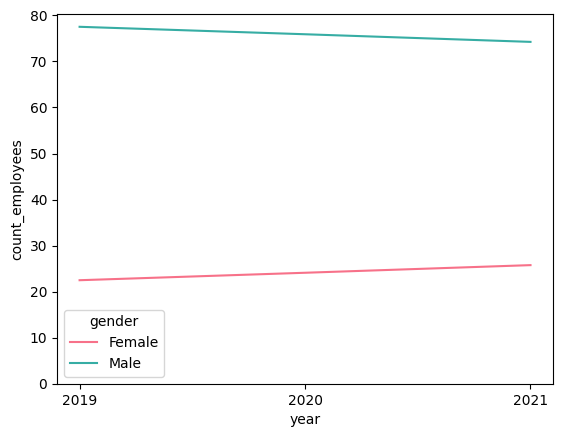

In [54]:
perc_num_plot = sns.lineplot(data = perc_qry, x='year', y='count_employees', hue = 'gender', palette="husl")
plt.ylim(0)
perc_num_plot.set(xticks=[2019, 2020, 2021])

Okay, good so far.
Now, I want to see the graphs of each of the job categories I'm interested in side-by-side. 

There's a way to do this using subplots, I believe.  
For now, though, let's make a helper function to do the above for me.
Inputs: filters and group by's, output: graph of the percentages.

Then, I can use this helper function to make the plots I need for my subplots. (I think.)

In [81]:
def graph_totals(company, job_cats, data = EEO1_data, sortBy1 = 'job_category', sortBy2 = 'gender', percent = False):
    """This takes in a company, job categories to show, and fields to filter by (defaulting to job_category and gender)
    and returns a line plot of the employee counts over the available years in the data set."""
    filtered_df = pd.DataFrame(data.query(f"company == '{company}'").query('job_category.isin(@job_cats)').groupby(["year", sortBy1, sortBy2]).agg({'count_employees': 'sum'}))
    if percent == True:
        percs = filtered_df.groupby(level = 0, group_keys = False).apply(lambda x:100 * x /float(x.sum()))
        data_to_graph = percs
    else:
        data_to_graph = filtered_df
        
    raw_num_plot = sns.lineplot(data = data_to_graph, x='year', y='count_employees', hue = sortBy2, palette="husl")
    plt.ylim(0)
    loc, labels = plt.xticks()
    plt.xticks(np.arange(math.ceil(min(loc)), max(loc), step = 1))


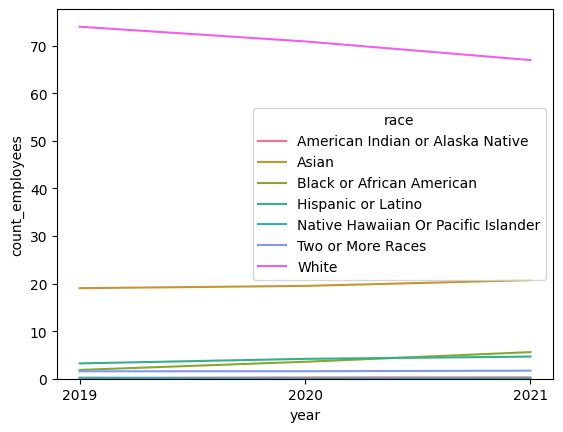

In [88]:
graph_totals('Amazon', ['Exec/Sr. Officials & Mgrs'], EEO1_data, sortBy2 = 'race', percent = True)


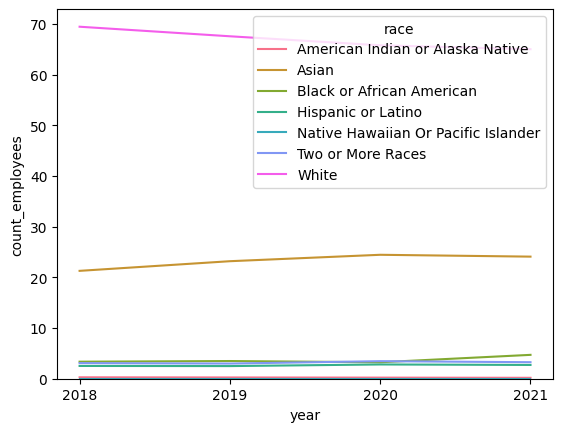

In [87]:
graph_totals('Alphabet', ['Exec/Sr. Officials & Mgrs'], EEO1_data, sortBy2 = 'race', percent = True)

Okay, now let's write the function for producing the graph of percents.
Then let's work on displaying them in subplot form.